In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/example_cluster.csv
file_url = "https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/example_cluster.csv"
df = pd.read_csv(file_url)

In [ ]:
df.head()

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520


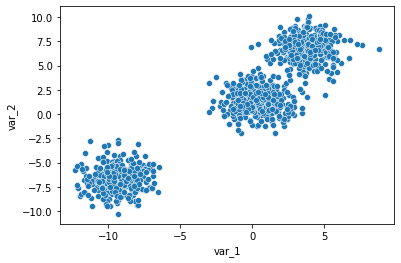

In [ ]:
sns.scatterplot(x='var_1', y='var_2', data=df)

In [ ]:
# K평균 군집화
from sklearn.cluster import KMeans

In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=100)

In [ ]:
kmeans_model.fit(df)

KMeans(n_clusters=3, random_state=100)

In [ ]:
pred = kmeans_model.predict(df)
pred

array([1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,

In [ ]:
df['label'] = pred

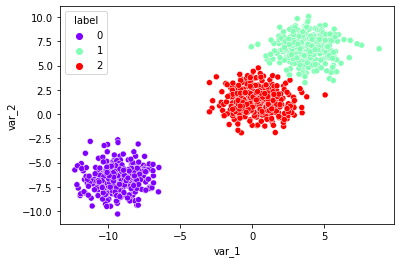

In [ ]:
sns.scatterplot(x='var_1', y='var_2', data=df,
                hue='label', palette='rainbow')

In [ ]:
# 이너셔(inertia)
# - 각 그룹에서의 중심과 각 그룹에 해당하는 데이터 간의 거리에 대한 합
kmeans_model.inertia_

3090.03323707666

In [ ]:
kmeans_model2 = KMeans(n_clusters=500, random_state=100)
kmeans_model2.fit(df)
kmeans_model2.inertia_

6.22354210658421

In [ ]:
df['label2'] = kmeans_model2.predict(df)

In [ ]:
df['label2']

0      124
1      114
2      439
3      297
4      474
      ... 
995    176
996    126
997    152
998    390
999    457
Name: label2, Length: 1000, dtype: int32

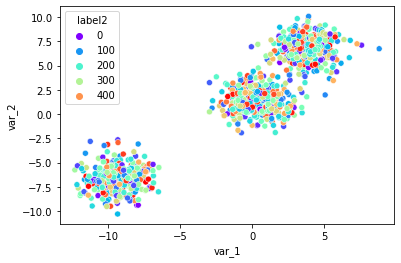

In [ ]:
sns.scatterplot(x='var_1', y='var_2', data=df,
                hue='label2', palette='rainbow')

In [ ]:
# 엘보우 기법
df = pd.read_csv(file_url)
distance = []
for k in range(2, 10): # k: 2~9
    k_model = KMeans(n_clusters=k)
    k_model.fit(df)
    distance.append(k_model.inertia_)

In [ ]:
distance

[9741.810795093243,
 3090.03323707666,
 2717.5965534527827,
 2378.6715166851404,
 2050.1131130111576,
 1824.3104802604043,
 1583.7790856489792,
 1369.057160571838]

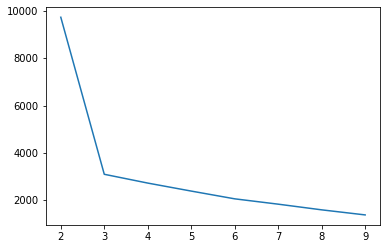

In [ ]:
sns.lineplot(x=range(2,10), y=distance)

In [ ]:
file_url = "https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/customer.csv"
df = pd.read_csv(file_url)

In [ ]:
df

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96
...,...,...,...
240449,4716561796955522,shopping,4.93
240450,30074693890476,shopping,140.12
240451,30404291151692,health_fitness,37.79
240452,4922710831011201,entertainment,17.50


In [ ]:
df.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [ ]:
df.describe(include='all')

,cc_num,category,amt
count,2.404540e+05,240454,240454.000000
unique,NaN,11,NaN
top,NaN,shopping,NaN
freq,NaN,40200,NaN
mean,3.365543e+17,NaN,69.758079
std,1.191447e+18,NaN,150.060270
min,6.049559e+10,NaN,1.000000
25%,2.131124e+14,NaN,9.740000
50%,2.720433e+15,NaN,47.530000
75%,4.642255e+15,NaN,82.950000


In [ ]:
df.cc_num.nunique()

100

In [ ]:
# 고객들을 군집화 -> 뭉쳐있는지 -> 분류별 소비금액 (100명)
customer_dummy = pd.get_dummies(df, columns=['category'])

In [ ]:
customer_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cc_num                   240454 non-null  int64  
 1   amt                      240454 non-null  float64
 2   category_entertainment   240454 non-null  uint8  
 3   category_food_dining     240454 non-null  uint8  
 4   category_gas_transport   240454 non-null  uint8  
 5   category_grocery         240454 non-null  uint8  
 6   category_health_fitness  240454 non-null  uint8  
 7   category_home            240454 non-null  uint8  
 8   category_kids_pets       240454 non-null  uint8  
 9   category_misc            240454 non-null  uint8  
 10  category_personal_care   240454 non-null  uint8  
 11  category_shopping        240454 non-null  uint8  
 12  category_travel          240454 non-null  uint8  
dtypes: float64(1), int64(1), uint8(11)
memory usage: 6.2 MB


In [ ]:
customer_dummy.columns[2:]

Index(['category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery', 'category_health_fitness',
       'category_home', 'category_kids_pets', 'category_misc',
       'category_personal_care', 'category_shopping', 'category_travel'],
      dtype='object')

In [ ]:
cat_list= customer_dummy.columns[2:]

In [ ]:
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,1,0,0,0
1,630423337322,107.23,0,0,0,1,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
for i in cat_list: # 열들의 이름
    # customer_dummy : 0, 1 * 금액 => 그 카테고리에 속한 금액
    customer_dummy[i] = customer_dummy[i] * customer_dummy['amt']

In [ ]:
customer_dummy

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [ ]:
customer_agg = customer_dummy.groupby('cc_num').sum()
customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


In [ ]:
customer_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 60495593109 to 4956828990005111019
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      100 non-null    float64
 1   category_entertainment   100 non-null    float64
 2   category_food_dining     100 non-null    float64
 3   category_gas_transport   100 non-null    float64
 4   category_grocery         100 non-null    float64
 5   category_health_fitness  100 non-null    float64
 6   category_home            100 non-null    float64
 7   category_kids_pets       100 non-null    float64
 8   category_misc            100 non-null    float64
 9   category_personal_care   100 non-null    float64
 10  category_shopping        100 non-null    float64
 11  category_travel          100 non-null    float64
dtypes: float64(12)
memory usage: 10.2 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled = scaler.fit_transform(customer_agg)
scaled # numpy array

array([[-1.40232671, -1.13561684, -0.97106905, ..., -1.07025953,
        -1.14142374, -0.61993021],
       [ 1.07940687,  0.41407488,  0.16887956, ...,  1.80734981,
         0.65996745, -0.22258695],
       [ 1.20015148,  0.74712739,  1.62296823, ...,  0.12782479,
         1.29993842,  2.7668909 ],
       ...,
       [-1.10768846, -0.9265974 , -1.1902022 , ..., -0.97473624,
        -0.66458252,  0.19333459],
       [-0.94081475, -0.80789527, -1.09326659, ..., -0.89572163,
        -0.70809415,  0.95453742],
       [ 0.59998262,  0.97669101,  0.61115793, ..., -0.39803373,
        -0.02063061, -0.08679376]])

In [ ]:
scaled_df = pd.DataFrame(scaled, columns=customer_agg.columns,
                         index=customer_agg.index)

In [ ]:
scaled_df

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796
...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038
4599735407877245080,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166
4666314527820883145,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335


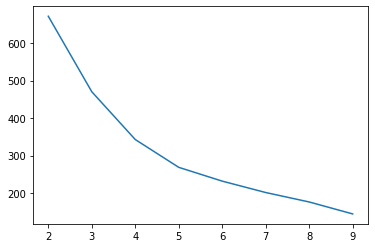

In [ ]:
distance = []
for k in range(2, 10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    distance.append(k_model.inertia_)

sns.lineplot(x=range(2, 10), y=distance)

In [ ]:
# 실루엣 계수
# - 이너셔 : 그룹의 중심으로부터 외부 요소 간의 거리...
# - 클러스터 내부의 평균 거리 + 최근접한 다른 클러스터 데이터의 평균 거리
from sklearn.metrics import silhouette_score

In [ ]:
silhouette = []
for k in range(2, 10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_df)
    labels = k_model.predict(scaled_df)
    silhouette.append(silhouette_score(scaled_df, labels))

In [ ]:
silhouette

[0.3717625086081594,
 0.37507693866618963,
 0.4263718472641203,
 0.3930850775191427,
 0.35746843849459603,
 0.3597949229806147,
 0.36828924013706404,
 0.3929606215601082]

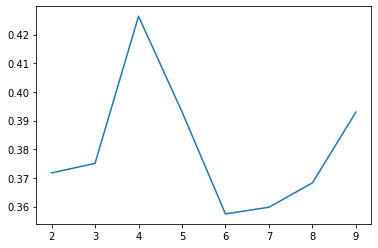

In [ ]:
# 실루엣 계수는 더 높은 값일 수록 더 좋은 분류
sns.lineplot(x=range(2, 10), y=silhouette) # k=4

In [ ]:
k_model = KMeans(n_clusters=4)
k_model.fit(scaled_df)
labels = k_model.predict(scaled_df)

In [ ]:
scaled_df['label'] = labels

In [ ]:
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
cc_num,,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,1
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,3
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,1


In [ ]:
scaled_df_mean = scaled_df.groupby('label').mean()
scaled_df_mean

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
label,,,,,,,,,,,,
0,-0.983797,-0.826826,-0.820264,-0.807530,-0.746914,-1.037601,-0.943190,-1.017107,-0.788890,-0.903252,-0.760563,-0.266604
1,0.181113,0.043536,0.071197,0.868891,0.032581,0.356233,0.220808,0.524956,0.235603,0.341387,-0.070841,-0.264840
2,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740
3,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970


In [ ]:
scaled_df_count = scaled_df.groupby('label').count().amt
scaled_df_count

label
0    36
1    46
2    10
3     8
Name: amt, dtype: int64

In [ ]:
scaled_df_count = scaled_df_count.rename('count')

In [ ]:
scale_df_all = scaled_df_mean.join(scaled_df_count)
scale_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,-0.983797,-0.826826,-0.820264,-0.807530,-0.746914,-1.037601,-0.943190,-1.017107,-0.788890,-0.903252,-0.760563,-0.266604,36
1,0.181113,0.043536,0.071197,0.868891,0.032581,0.356233,0.220808,0.524956,0.235603,0.341387,-0.070841,-0.264840,46
2,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10
3,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
